In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
data=pd.read_csv("Add_sales_data_2018.csv")

In [2]:
data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [3]:
#check for null values
data.isnull().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

There is no null values in the data

In [4]:
#details of the datset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [5]:
#description of the data
data.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


array([[<AxesSubplot:title={'center':'Add1(in Thousands)'}>,
        <AxesSubplot:title={'center':'Add2(in Thousands)'}>],
       [<AxesSubplot:title={'center':'Add3(in Thousands)'}>,
        <AxesSubplot:title={'center':'Add4(in Thousands)'}>],
       [<AxesSubplot:title={'center':'Add5(in Thousands)'}>,
        <AxesSubplot:title={'center':'Profit(in Thousands)'}>]],
      dtype=object)

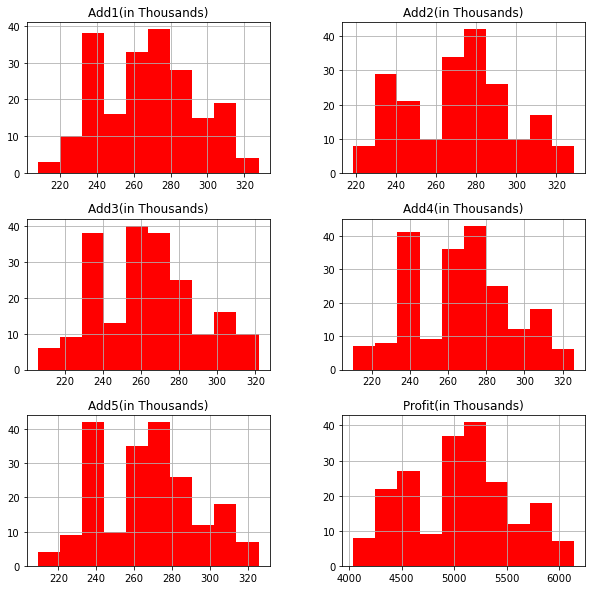

In [6]:
#ploting each column in the dataset
data.hist(figsize=(10,10),color='red')

### 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

In [7]:
coormatrix=data.corr()

<AxesSubplot:>

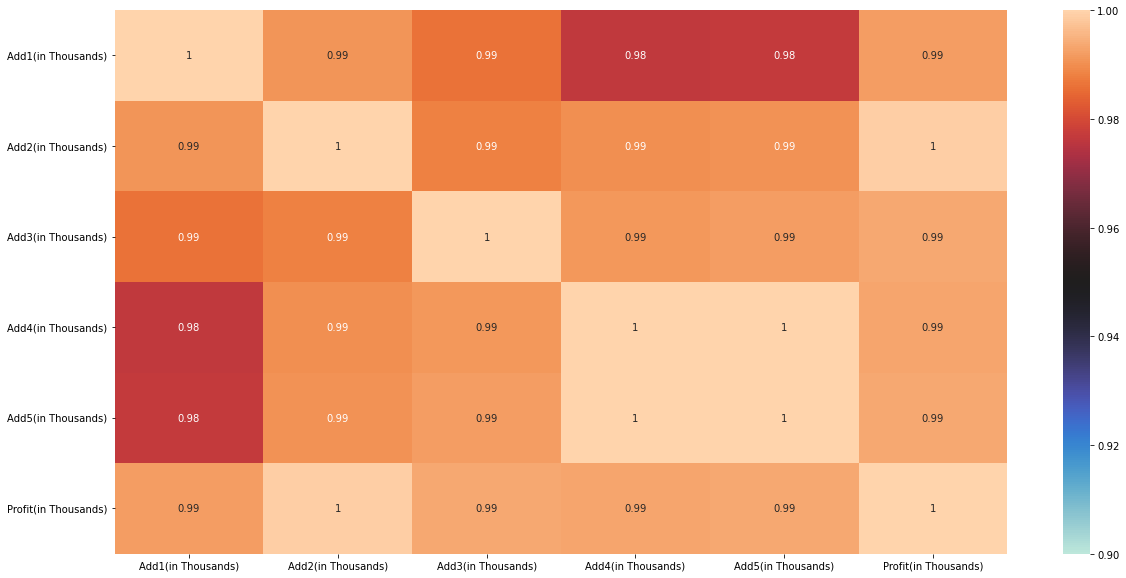

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(coormatrix,vmin=.9,vmax=1,annot=True,cmap="icefire")

From the correlation matrix we can conclude that variables are highly coorelated and the columns(Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands) has vital role in determining the profit).

### 2. Build a regression model to predict the profit from the given data and comment your findings on it

In [9]:
y=data['Profit(in Thousands)']
x=data[['Add1(in Thousands)','Add2(in Thousands)','Add3(in Thousands)','Add4(in Thousands)','Add5(in Thousands)']]

In [10]:
x_train, x_test, y_train, y_test= train_test_split(x,y, random_state= 42,test_size= 0.20)

In [11]:
linear= linear_model.LinearRegression()
model=linear.fit(x_train, y_train)
predictions= model.predict(x_test)

In [12]:
print('MSE is: %0.3f'% mean_squared_error(y_test, predictions))

MSE is: 0.000


The Mean squared error is 0 then the model can be said as best fit

In [13]:
from sklearn.metrics import r2_score
print('R squared value is : ',r2_score(y_test,predictions))

R squared value is :  1.0


 R-square=1 indicates perfect fit

In [14]:
print('The coefficient values of Add1(in Thousands), Add2(in Thousands), Add3(in Thousands), Add4(in Thousands),Add5(in Thousands) is as follows: \n',model.coef_)

The coefficient values of Add1(in Thousands), Add2(in Thousands), Add3(in Thousands), Add4(in Thousands),Add5(in Thousands) is as follows: 
 [ 1.   12.38  3.5   1.    0.9 ]


Coefficient of Add2(12.38) is higher and the coefficient of Add5(0.9) is lower

### 3.Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

In [15]:
#Add1(in Thousands) 290
#Add2(in Thousands) 312
#Add3(in Thousands) 309
#Add4(in Thousands) 298
#Add5(in Thousands) 320

In [16]:
n_data= np.array([[290, 312, 309, 298, 320]])
linear.predict(n_data)

array([5820.06])

The predicted profit for the company is 5820.06